In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/hw2

/content/drive/MyDrive/hw2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords

In [4]:
# Read the input text file into a DataFrame
df = pd.read_csv('data.txt')
df = df.sample(frac=1)

In [5]:
df = df.drop(columns=['Unnamed: 0'])

no_neutral = True

df = df.rename(columns={'text':'review', 'stars':'sentiment'})

if no_neutral:
    df = df[df['sentiment']!=3]
    df['sentiment'] = df['sentiment'].apply(lambda x: int(x>3))
else:
    df['sentiment'] = df['sentiment'].apply(lambda x: np.sign(x-3)+1)

In [6]:
from tensorflow.keras.utils import to_categorical

label = df.sentiment
label.unique()
num_classes = len(set(label))
one_hot_labels = to_categorical(label, num_classes=num_classes)

In [7]:
from gensim.parsing.porter import PorterStemmer
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
porter_stemmer = PorterStemmer()
review = df.review.values
review = [simple_preprocess(line, deacc=True) for line in review] 
review = [[porter_stemmer.stem(word) for word in tokens] for tokens in review]
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(review)
sequences = tokenizer.texts_to_sequences(review)

In [8]:
vocab_size = len(tokenizer.word_index)+1
vocab_size

22393

In [9]:
maxlen = 200
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

In [10]:
from sklearn.model_selection import train_test_split
#split data into training and testing
padded_sequences, test_padded_sequences = train_test_split(padded_sequences, test_size=0.2, shuffle=False)
one_hot_labels, test_one_hot_labels = train_test_split(one_hot_labels, test_size=0.2, shuffle=False)

In [11]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'to': 3, 'wa': 4, 'it': 5, 'of': 6, 'for': 7, 'in': 8, 'is': 9, 'on': 10, 'we': 11, 'my': 12, 'that': 13, 'thei': 14, 'thi': 15, 'with': 16, 'but': 17, 'not': 18, 'you': 19, 'have': 20, 'had': 21, 'were': 22, 'at': 23, 'food': 24, 'be': 25, 'so': 26, 'place': 27, 'ar': 28, 'there': 29, 'good': 30, 'order': 31, 'as': 32, 'time': 33, 'me': 34, 'our': 35, 'go': 36, 'out': 37, 'get': 38, 'veri': 39, 'if': 40, 'like': 41, 'all': 42, 'great': 43, 'servic': 44, 'just': 45, 'us': 46, 'here': 47, 'when': 48, 'would': 49, 'back': 50, 'from': 51, 'up': 52, 'or': 53, 'no': 54, 'their': 55, 'she': 56, 'an': 57, 'about': 58, 'can': 59, 'he': 60, 'will': 61, 'what': 62, 'which': 63, 'been': 64, 'even': 65, 'wait': 66, 'realli': 67, 'onli': 68, 'got': 69, 'them': 70, 'becaus': 71, 'do': 72, 'after': 73, 'other': 74, 'by': 75, 'come': 76, 'some': 77, 'more': 78, 'your': 79, 'also': 80, 'look': 81, 'ask': 82, 'restaur': 83, 'don': 84, 've': 85, 'want': 86, 'make': 87, 'love': 88, 'n

In [12]:
print(review[0])
print(sequences[0])

['thi', 'place', 'wa', 'unreal', 'the', 'chip', 'and', 'queso', 'were', 'so', 'warm', 'and', 'delici', 'the', 'burrito', 'got', 'with', 'fri', 'shrimp', 'and', 'cauliflow', 'in', 'it', 'sound', 'weird', 'but', 'it', 'wa', 'incred', 'the', 'food', 'wa', 'so', 'flavor', 'and', 'such', 'good', 'mix', 'of', 'tast', 'the', 'churro', 'were', 'to', 'die', 'for', 'the', 'staff', 'were', 'all', 'super', 'friendli', 'and', 'nice', 'if', 'you', 'ar', 'look', 'for', 'some', 'amaz', 'mexican', 'food', 'go', 'here']
[15, 27, 4, 3666, 1, 439, 2, 1754, 22, 26, 546, 2, 151, 1, 740, 69, 16, 133, 277, 2, 2233, 8, 5, 737, 970, 17, 5, 4, 576, 1, 24, 4, 26, 177, 2, 394, 30, 567, 6, 120, 1, 4135, 22, 3, 1184, 7, 1, 99, 22, 42, 293, 143, 2, 93, 40, 19, 28, 81, 7, 77, 176, 571, 24, 36, 47]


In [13]:
print(padded_sequences[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0   15   27    4 3666    1
  439    2 1754   22   26  546    2  151    1  740   69   16  133  277
    2 2233    8    5  737  970   17    5    4  576    1   24    4   26
  177    2  394   30  567    6  120    1 4135   22    3 1184    7    1
   99   22   42  293  143    2   93   40   19   28   81    7   77  176
  571 

In [14]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

num_classes = len(label.unique())
window_sizes = [2, 3, 4, 5]
num_filters = 10
architecture = "LSTM"
activation = "relu"

if architecture == "LSTM":
    model = Sequential()
    model.add(Embedding(vocab_size, output_dim=30, input_length=maxlen))
    model.add(SpatialDropout1D(0.25))
    model.add(LSTM(64, activation=activation, dropout=0.5, recurrent_dropout=0.5))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
else:
    model = Sequential()
    model.add(Embedding(vocab_size, output_dim=30, input_length=maxlen))
    model.add(SpatialDropout1D(0.25))
    model.add(Conv1D(num_filters, kernel_size=window_sizes[0], activation=activation))
    model.add(MaxPooling1D())
    for window_size in window_sizes[1:]:
        model.add(Conv1D(num_filters, kernel_size=window_size, activation=activation))
        model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 30)           671790    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 30)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                24320     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 696,240
Trainable params: 696,240
Non-trainable params: 0
__________________________________________________

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(padded_sequences,one_hot_labels,validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])

Epoch 1/20
400/400 [==============================] - 211s 509ms/step - loss: 259.3630 - accuracy: 0.6818 - val_loss: 0.5437 - val_accuracy: 0.7788
Epoch 2/20
400/400 [==============================] - 175s 437ms/step - loss: 0.5832 - accuracy: 0.7872 - val_loss: 0.4525 - val_accuracy: 0.8006
Epoch 3/20
400/400 [==============================] - 174s 434ms/step - loss: 0.4296 - accuracy: 0.8193 - val_loss: 0.4233 - val_accuracy: 0.8094
Epoch 4/20
400/400 [==============================] - 164s 410ms/step - loss: 0.3968 - accuracy: 0.8341 - val_loss: 0.4080 - val_accuracy: 0.8172
Epoch 5/20
400/400 [==============================] - 164s 409ms/step - loss: 0.3989 - accuracy: 0.8412 - val_loss: 0.4072 - val_accuracy: 0.8138
Epoch 6/20
400/400 [==============================] - 168s 420ms/step - loss: 0.3643 - accuracy: 0.8465 - val_loss: 0.4004 - val_accuracy: 0.8184
Epoch 7/20
400/400 [==============================] - 163s 408ms/step - loss: 0.3459 - accuracy: 0.8536 - val_loss: 0.3974

In [16]:
model.save('lstm_relu.h5')

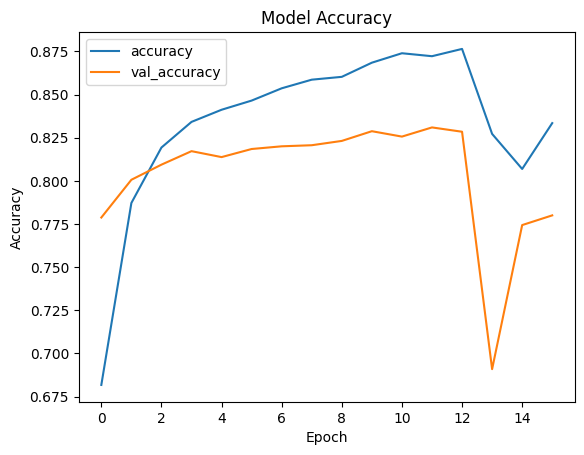

In [17]:
# Plot training and validation accuracy scores
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

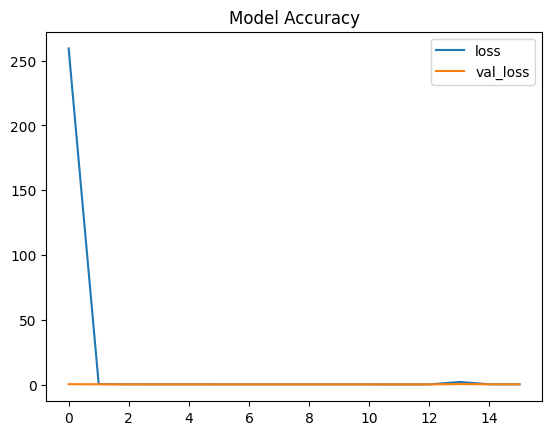

In [18]:
# Plot training and validation accuracy scores
plt.plot(history.history['loss'], label ='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [19]:
loss, accuracy = model.evaluate(test_padded_sequences, test_one_hot_labels)
print("Accuracy: {:.2f}%".format(accuracy*100))

125/125 [==============================] - 9s 70ms/step - loss: 0.4704 - accuracy: 0.7868
Accuracy: 78.68%


In [20]:
from sklearn.metrics import classification_report

# Make predictions using the trained model
y_pred = model.predict(test_padded_sequences)

# Convert the predictions from probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(np.argmax(test_one_hot_labels, axis=1), y_pred))

125/125 [==============================] - 8s 65ms/step
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1982
           1       0.78      0.80      0.79      2018

    accuracy                           0.79      4000
   macro avg       0.79      0.79      0.79      4000
weighted avg       0.79      0.79      0.79      4000

